<div class="alert alert-block alert-info alert">  
    
# <span style ="color:#f2074e;">Capstone Project: Online Movie Ratings

I completed this project as part of a Udemy course by Jose Portilla. 

For more information, visit <a href='http://www.pieriandata.com'>www.pieriandata.com

Copyright by Pierian Data Inc.

## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

## <span style ="color:#cc2185;">Part One: Understanding the Background and Data


Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

After reading the article, read these two tables giving an overview of the two .csv files we will be working with:

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### 1) fandango_scape.csv
`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

#### 2) all_sites_scores.csv

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----

**TASK: Import any libraries you think you will use:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <span style ="color:#cc2185;"> Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Import/Read the fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes.**

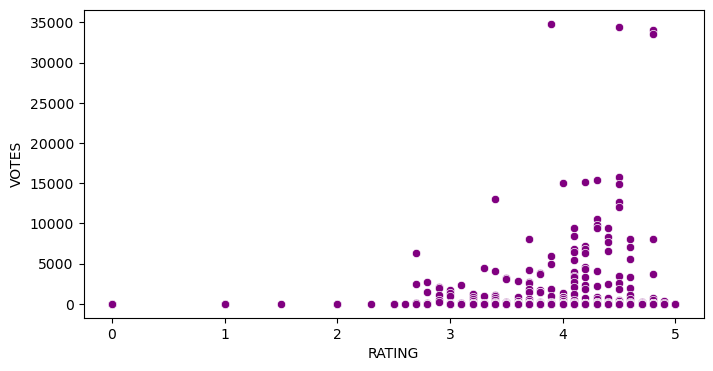

In [6]:
plt.figure(figsize=(8,4), dpi=100)
sns.scatterplot(fandango, x="RATING", y="VOTES", color="purple");

# data=fandango
# x represents categorical variable (RATING)
# y represents numerical variable (VOTES)

**TASK: Calculate the correlation between the columns:**

In [7]:
# Without "numeric_only =True)", it gives error if there are non-numeric columns
fandango.corr(numeric_only =True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [8]:
# Import regular expression operations
import re

In [9]:
# Write a function

def extract_year(film_title):
    match = re.search(r'\((\d{4})\)', film_title)
    if match:
        return match.group(1)
    return None

In [10]:
# Extract years form the "FILM" column using apply and add as a new column to the df

fandango['YEAR'] = fandango['FILM'].apply(extract_year)

In [11]:
# Check the new column
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


##### Alternative solution: use apply and lambda 

In [12]:
# fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

# After split we still had ")". So, we removed it using replace "".                                                                                

In [13]:
# fandango.head()

**TASK: How many movies are in the Fandango DataFrame per year?**

In [14]:
fandango["YEAR"].value_counts()

YEAR
2015    477
2014     24
2016      1
1964      1
2012      1
Name: count, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

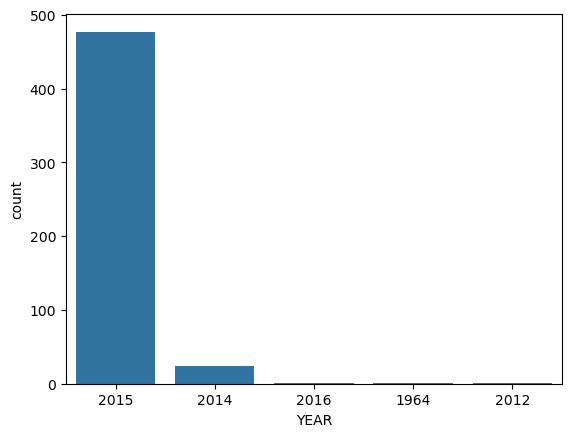

In [15]:
sns.countplot(fandango, x="YEAR");

**TASK: What are the 10 movies with the highest number of votes?**

In [16]:
fandango.sort_values("VOTES", ascending=False)[:10]

# "ascending=False" means descending order

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


##### Alternative solution: "nlargest"

In [17]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [18]:
(fandango["VOTES"]==0).sum()

69

In [19]:
# Or we could assign it to a variable, then take the sum

zero_votes = fandango["VOTES"]==0 
zero_votes.sum()

69

##### Alternative way: take the length of the related df

In [20]:
len(fandango[fandango["VOTES"] == 0])

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [21]:
# A new DataFrame excluding zero votes

reviewed_films = fandango[fandango["VOTES"]!=0] 
reviewed_films.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [22]:
# Since there is no negative votes, Votes>0 would give the same result 
# fandango[fandango["VOTES"]>0] 

In [23]:
# The length of the entire dataset
len(fandango)

504

In [24]:
# DataFrame without zero votes. The difference is 69 (the number of zero votes)
len(reviewed_films)

435

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Use the reviewed films data that you created and draw a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

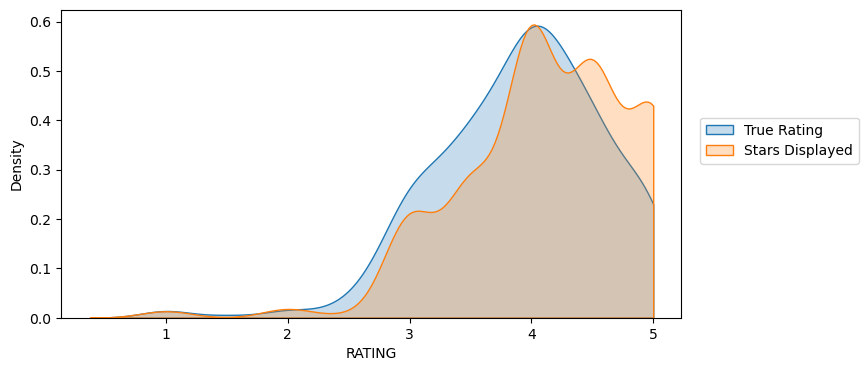

In [25]:
plt.figure(figsize=(8,4), dpi=100)
sns.kdeplot(reviewed_films, x="RATING", fill=True, clip=[0,5], label= "True Rating")
sns.kdeplot(reviewed_films, x="STARS", fill=True, clip=[0,5], label= "Stars Displayed")

# clip[0,5] is used to limit the plot between 0 and 5

# legend goes out of the canvas
plt.legend(loc=(1.03,0.5));

**TASK: Let's now actually quantify this discrepancy. Create a new column of the difference between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [26]:
# create a new column showing the difference and round it
reviewed_films["STARS-RATING"] = (reviewed_films["STARS"] - reviewed_films["RATING"]).round(2)

C:\Users\admin\AppData\Local\Temp\ipykernel_11644\780437680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films["STARS-RATING"] = (reviewed_films["STARS"] - reviewed_films["RATING"]).round(2)


In [27]:
 # check the new df
reviewed_films.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [28]:
# The solution above worked but we could round the it in the second step

reviewed_films["STARS-RATING"] = reviewed_films["STARS"] - reviewed_films["RATING"]
# round it 
reviewed_films["STARS-RATING"] = reviewed_films["STARS-RATING"].round(2)               
# check the new df
reviewed_films.head() 

C:\Users\admin\AppData\Local\Temp\ipykernel_11644\4104959206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films["STARS-RATING"] = reviewed_films["STARS"] - reviewed_films["RATING"]
C:\Users\admin\AppData\Local\Temp\ipykernel_11644\4104959206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films["STARS-RATING"] = reviewed_films["STARS-RATING"].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

C:\Users\admin\AppData\Local\Temp\ipykernel_11644\2737220682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(reviewed_films, x="STARS-RATING", palette="rocket")


<Axes: xlabel='STARS-RATING', ylabel='count'>

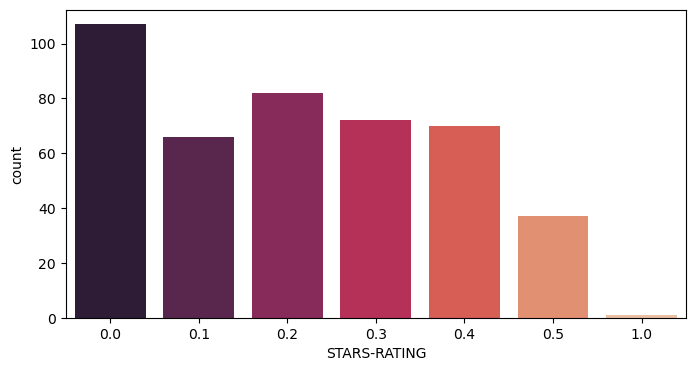

In [29]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(reviewed_films, x="STARS-RATING", palette="rocket")

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [30]:
reviewed_films[reviewed_films["STARS-RATING"]==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Turbo Kid (2015) has the highest difference (1 point).

## <span style ="color:#cc2185;">Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file**

In [31]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [32]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [33]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [34]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes (RT)

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

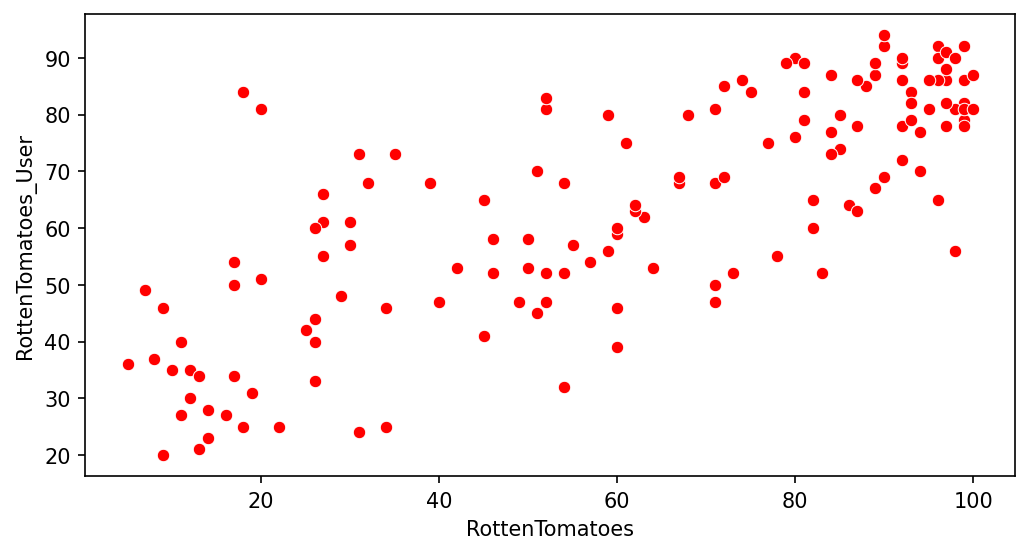

In [35]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(all_sites, x="RottenTomatoes", y="RottenTomatoes_User", color="red");

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. 

**Note:** Rotten_Diff here is Critics - User Score. So, values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [36]:
all_sites["RT_Diff"]= all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [37]:
# check the df with new column
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, **first take the absolute value of all the differences, then take the mean.** This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [38]:
# 1- take the absolute value using apply(abs)
# 2- take the mean of the column

all_sites["RT_Diff"].apply(abs).mean()

15.095890410958905

So, the mean of the difference is over 15.

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

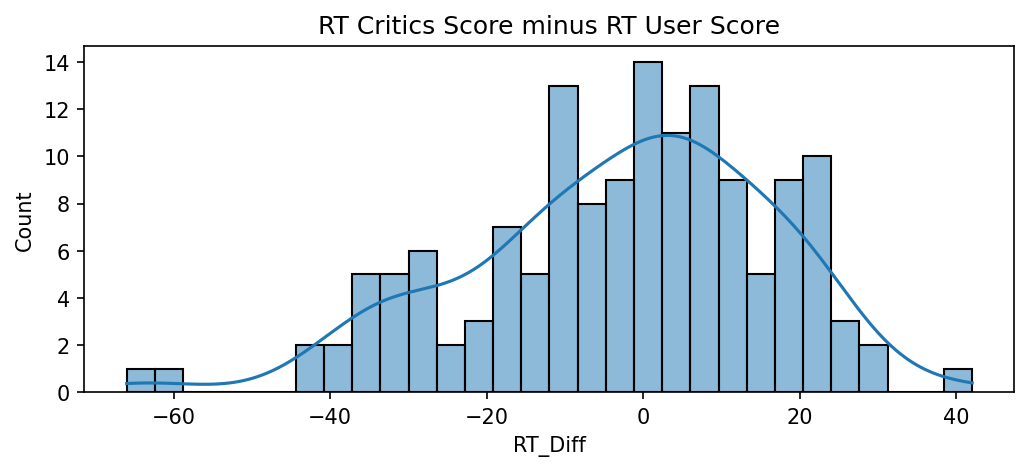

In [39]:
plt.figure(figsize=(8,3),dpi=150)
sns.histplot(all_sites, x="RT_Diff", kde=True, bins=30)

# Title
plt.title("RT Critics Score minus RT User Score");  

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

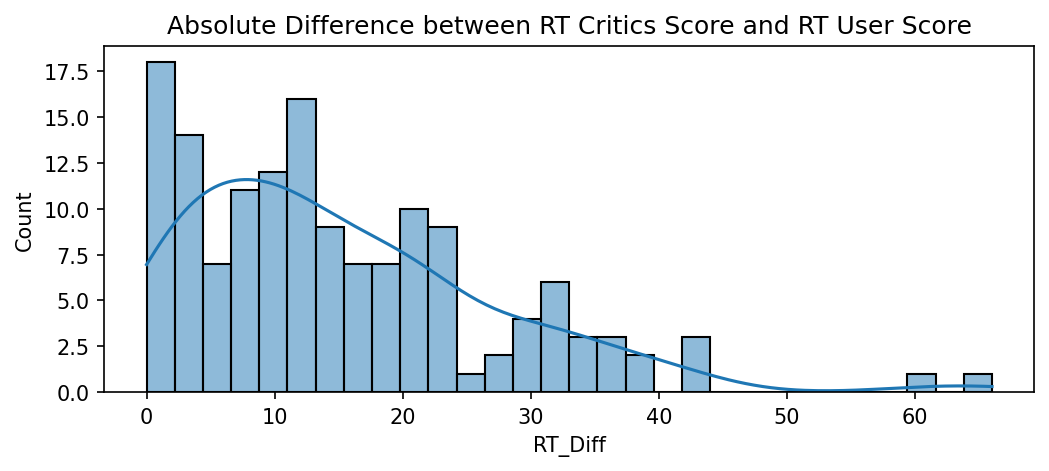

In [40]:
# x for absolute values --> "all_sites["RT_Diff"].apply(abs)"

plt.figure(figsize=(8,3),dpi=150)
sns.histplot(all_sites, x=all_sites["RT_Diff"].apply(abs), kde=True, bins=30)

# Title
plt.title("Absolute Difference between RT Critics Score and RT User Score"); 

Let's find out which movies are causing the largest differences. First, show **the top 5 movies with the largest *negative* difference between Users and RT critics**. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.

**TASK: What are the top 5 movies users rated higher than critics on average:**

##### Solution 1: Use "nsmallest" for the negative difference 

In [41]:
top_5_neg_dif = all_sites.nsmallest(5, "RT_Diff")

print("Top 5 Negative Differences:")
top_5_neg_dif

Top 5 Negative Differences:


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


##### If we want show only the FILM and RT_Diff columns...

In [42]:
top_5_neg_dif[["FILM","RT_Diff"]]

,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


##### Without assigning it to any variable

In [43]:
 all_sites.nsmallest(5, "RT_Diff")[["FILM","RT_Diff"]]

,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [44]:
top_5_pos_dif = all_sites.nlargest(5, "RT_Diff")

print("Top 5 Positive Differences:")
top_5_pos_dif 

Top 5 Positive Differences:


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


##### Solution 2: Use sort_values

In [45]:
# For negative differences we do not need to write ascending/descending because it is by default in asc order 
sorted_df_neg = all_sites.sort_values(by="RT_Diff")

In [46]:
# Get top 5 negative differences
top_5_negative = sorted_df_neg.head(5)
top_5_negative

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


##### If we want to display only the FILM and RT_Diff columns...

In [47]:
top_5_negative[["FILM", "RT_Diff"]]

,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

##### Solution 1: Use "nlargest" for the positive difference 

In [48]:
top_5_pos_dif = all_sites.nlargest(5, "RT_Diff")

print("Top 5 Positive Differences:")
top_5_pos_dif

Top 5 Positive Differences:


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


##### Show only the FILM and RT_Diff columns

In [49]:
top_5_pos_dif[["FILM","RT_Diff"]]

,FILM,RT_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


##### Solution 2: Use sort_values

In [50]:
# For 5 Positive 
sorted_df_pos = all_sites.sort_values(by="RT_Diff", ascending=False) # it must be in descending order

In [51]:
# Get top 5 positive differences
top_5_positive = sorted_df_pos.head(5)
top_5_positive

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24


In [52]:
# Only related columns
top_5_positive[["FILM", "RT_Diff"]]

,FILM,RT_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

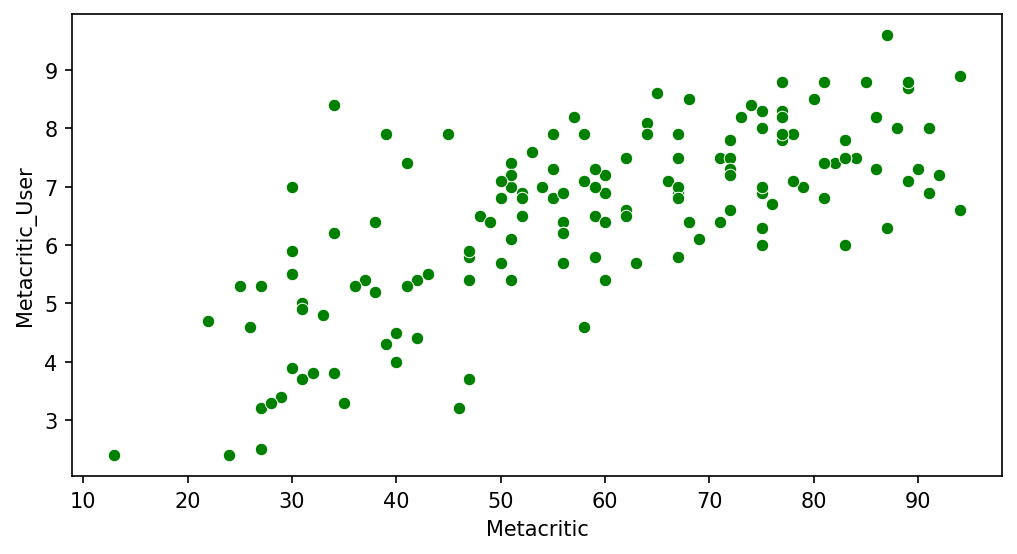

In [53]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(all_sites, x="Metacritic", y="Metacritic_User", color="green");

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

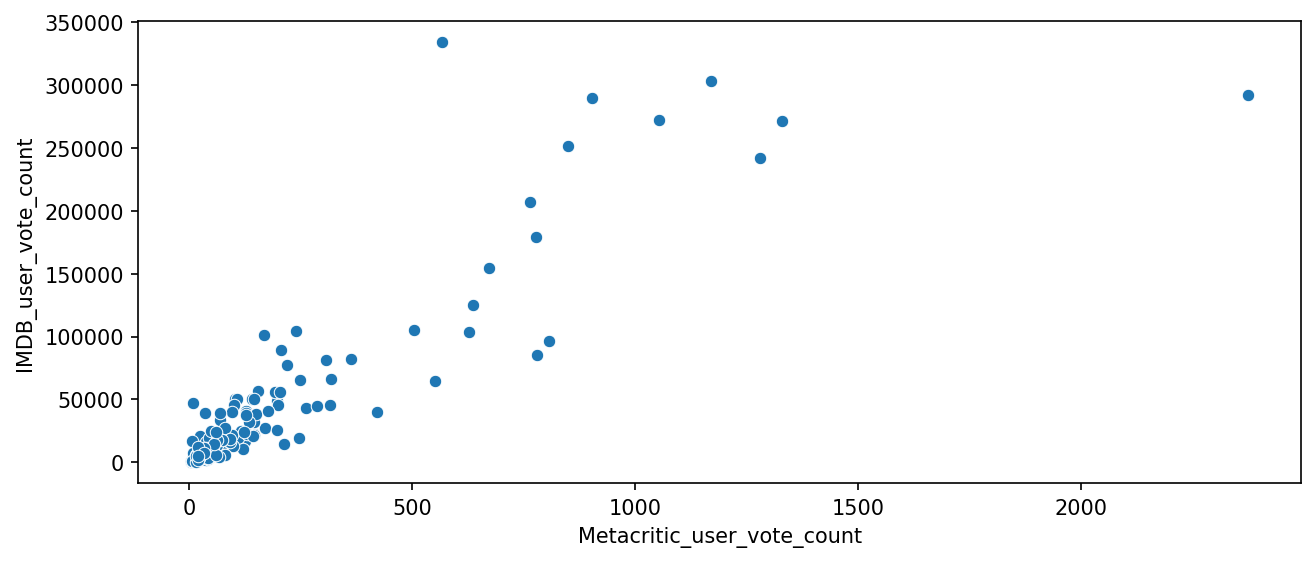

In [54]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(all_sites, x="Metacritic_user_vote_count", y="IMDB_user_vote_count");

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

**TASK: What movie has the highest IMDB user vote count?**

##### Solution 1: "nlargest"

In [55]:
all_sites.nlargest(1, "IMDB_user_vote_count")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


##### Solution 2: value_counts

In [56]:
highest_IMDB_users= all_sites.sort_values(by="IMDB_user_vote_count", ascending=False) # the biggest number
highest_IMDB_users.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**TASK: What movie has the highest Metacritic User Vote count?**

##### Solution 1: "nlargest"

In [57]:
all_sites.nlargest(1, "Metacritic_user_vote_count") 

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


##### Solution 2: value_counts

In [58]:
highest_IMDB_users= all_sites.sort_values(by="Metacritic_user_vote_count", ascending=False) # the biggest number
highest_IMDB_users.head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [59]:
# By default, the merge function performs an "inner" join. Or else, we would use how='inner' argument
# We have a common column, "FILM"
merged_sites = pd.merge(fandango, all_sites, on="FILM")

In [60]:
merged_sites.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [61]:
merged_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_Diff                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. For a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [62]:
# Let's check its maximum values before normalizing it
merged_sites.describe().T["max"]

# For these columns the upper limits are 100 or 10

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
RT_Diff                           42.0
Name: max, dtype: float64

##### We will normalize them by dividing them 20 or 2 depending on the scores. Then we will round it with one decimal.

In [63]:
merged_sites["RT_normalized"] = np.round(merged_sites["RottenTomatoes"] /20,1)           # round one decimal
merged_sites["RT_User_normalized"] = np.round(merged_sites["RottenTomatoes_User"] /20,1)

merged_sites["Met_normalized"] = np.round(merged_sites["Metacritic"] /20,1)
merged_sites["Met_User_normalized"] = np.round(merged_sites["Metacritic_User"] /2,1)

merged_sites["IMDB_normalized"] = np.round(merged_sites["IMDB"] /2,1)

# Warning: In every run, it will create new columns divided by given numbers.

In [64]:
merged_sites.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,RT_normalized,RT_User_normalized,Met_normalized,Met_User_normalized,IMDB_normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [65]:
# Let's see all columns and choose the asked 7 columns
merged_sites.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'RT_Diff',
       'RT_normalized', 'RT_User_normalized', 'Met_normalized',
       'Met_User_normalized', 'IMDB_normalized'],
      dtype='object')

In [66]:
norm_scores = merged_sites[["STARS", "RATING", 
                            "RT_normalized", "RT_User_normalized",
                            "Met_normalized", "Met_User_normalized",
                           "IMDB_normalized"]]

In [67]:
norm_scores.head()

,STARS,RATING,RT_normalized,RT_User_normalized,Met_normalized,Met_User_normalized,IMDB_normalized
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

##### Solution 1: Create a kde plot for all columns

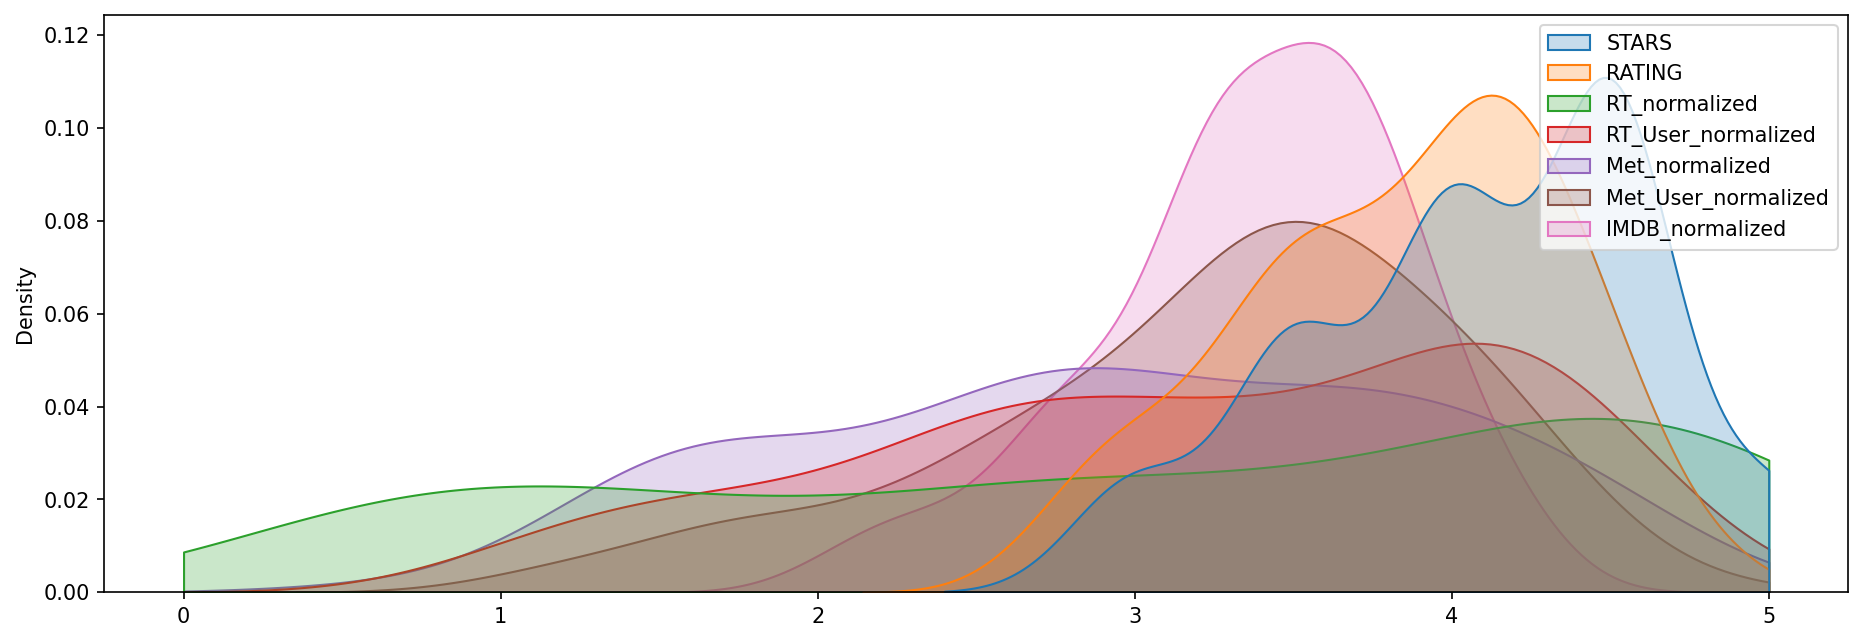

In [68]:
plt.figure(figsize=(15,5), dpi=150)

# We can ristrict it with the range 0-5 using clip=[]
sns.kdeplot(norm_scores, fill=True, clip=[0,5]);

##### Solution 2: Create KDE plot for each column (to display legen in a better location )

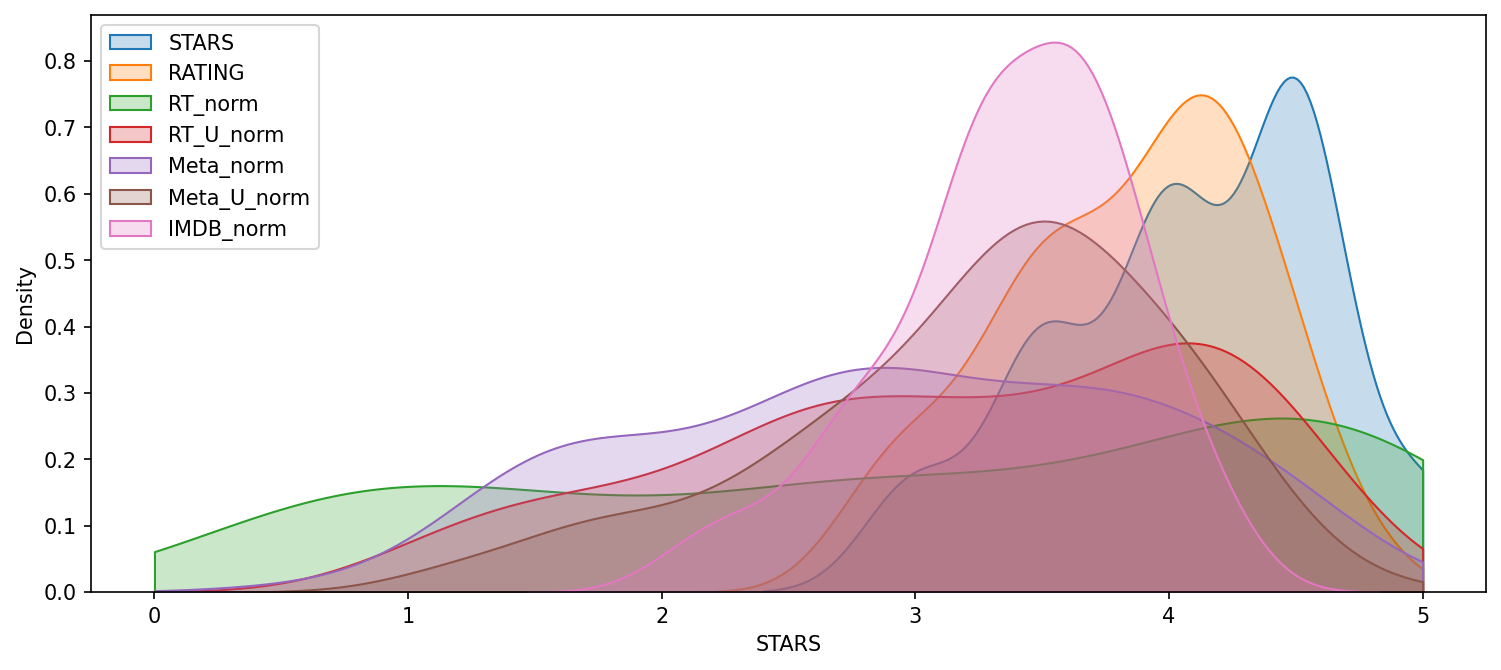

In [69]:
plt.figure(figsize=(12,5), dpi=150)

sns.kdeplot(norm_scores, x="STARS", fill=True, clip=[0,5], label="STARS")
sns.kdeplot(norm_scores, x="RATING", fill=True, clip=[0,5], label="RATING")
sns.kdeplot(norm_scores, x="RT_normalized", fill=True, clip=[0,5], label="RT_norm")
sns.kdeplot(norm_scores, x="RT_User_normalized", fill=True, clip=[0,5], label="RT_U_norm")
sns.kdeplot(norm_scores, x="Met_normalized", fill=True, clip=[0,5], label="Meta_norm")
sns.kdeplot(norm_scores, x="Met_User_normalized", fill=True, clip=[0,5], label="Meta_U_norm")
sns.kdeplot(norm_scores, x="IMDB_normalized", fill=True, clip=[0,5], label="IMDB_norm")

# Legend
plt.legend(loc="upper left");

##### Solution 3: Use a function for these KDE plots (to solve the legend issue)

In [70]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

# I replaced the "legendHandles" attribute and used "legend_handles" instead
# because it was deprecated in Matplotlib 3.7 and will be removed two minor releases later.

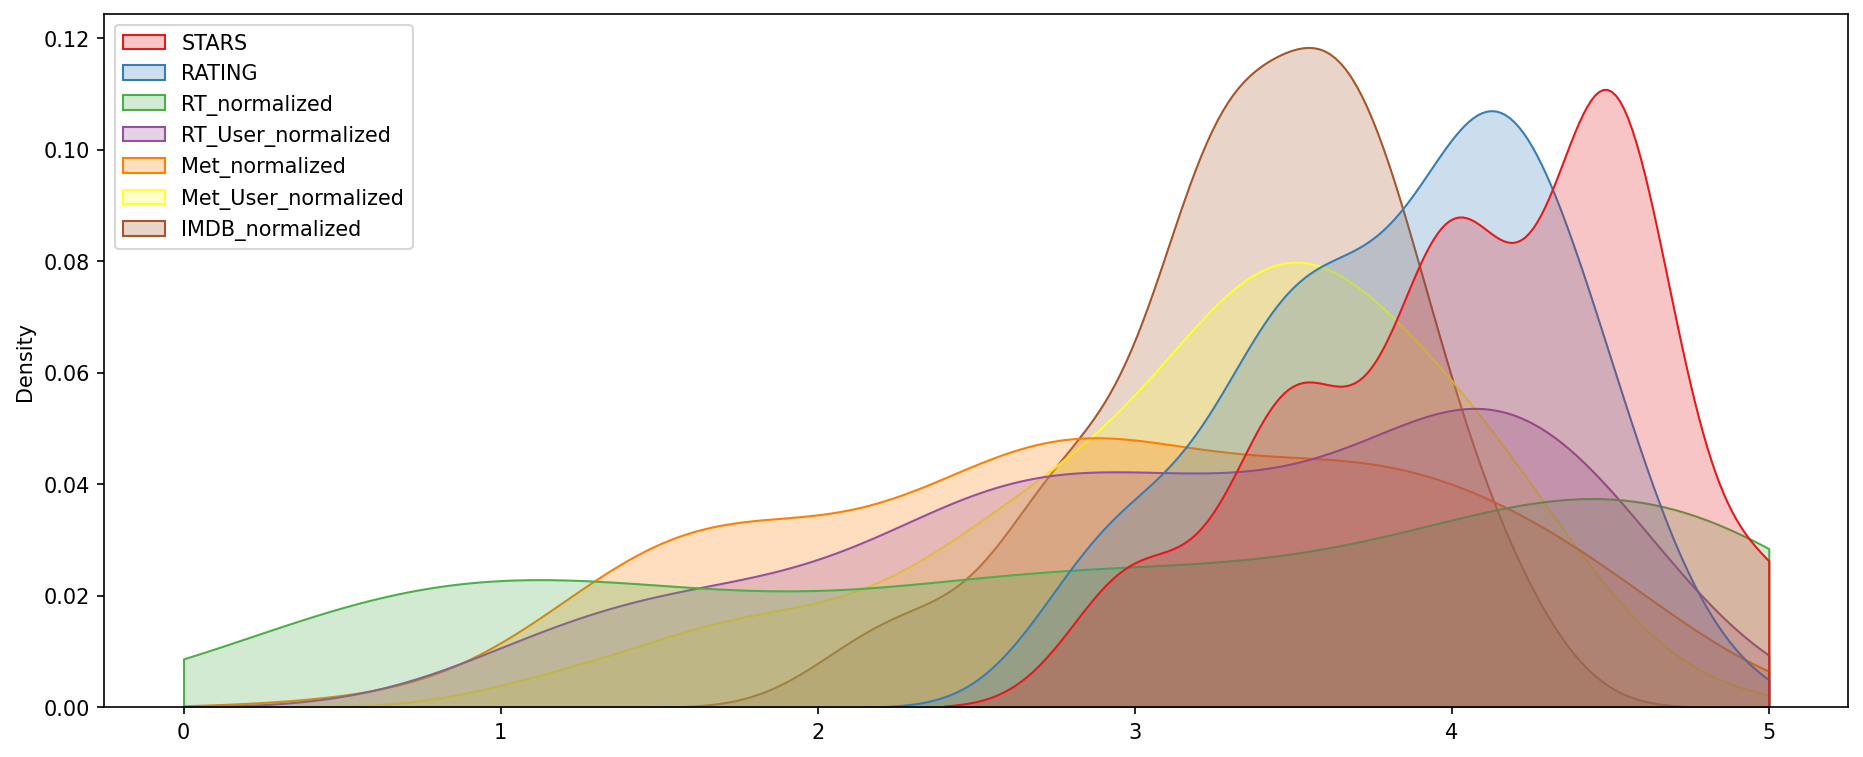

In [71]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True, palette='Set1',ax=ax)
move_legend(ax, "upper left");

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

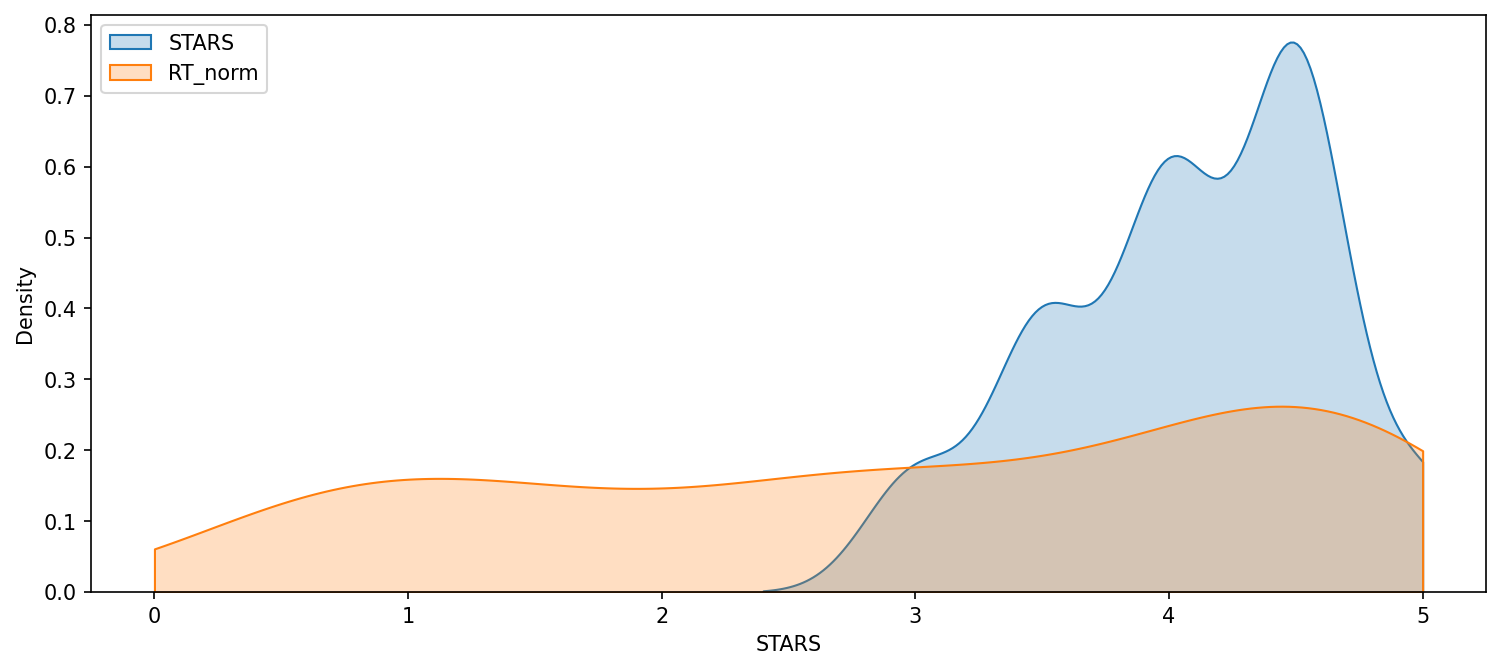

In [72]:
# KDE plot for only STARS and RT

plt.figure(figsize=(12,5), dpi=150)
sns.kdeplot(norm_scores, x="STARS", fill=True, clip=[0,5], label="STARS")
sns.kdeplot(norm_scores, x="RT_normalized", fill=True, clip=[0,5], label="RT_norm")

plt.legend(loc="upper left");

##### Alternative solution : Use the above function

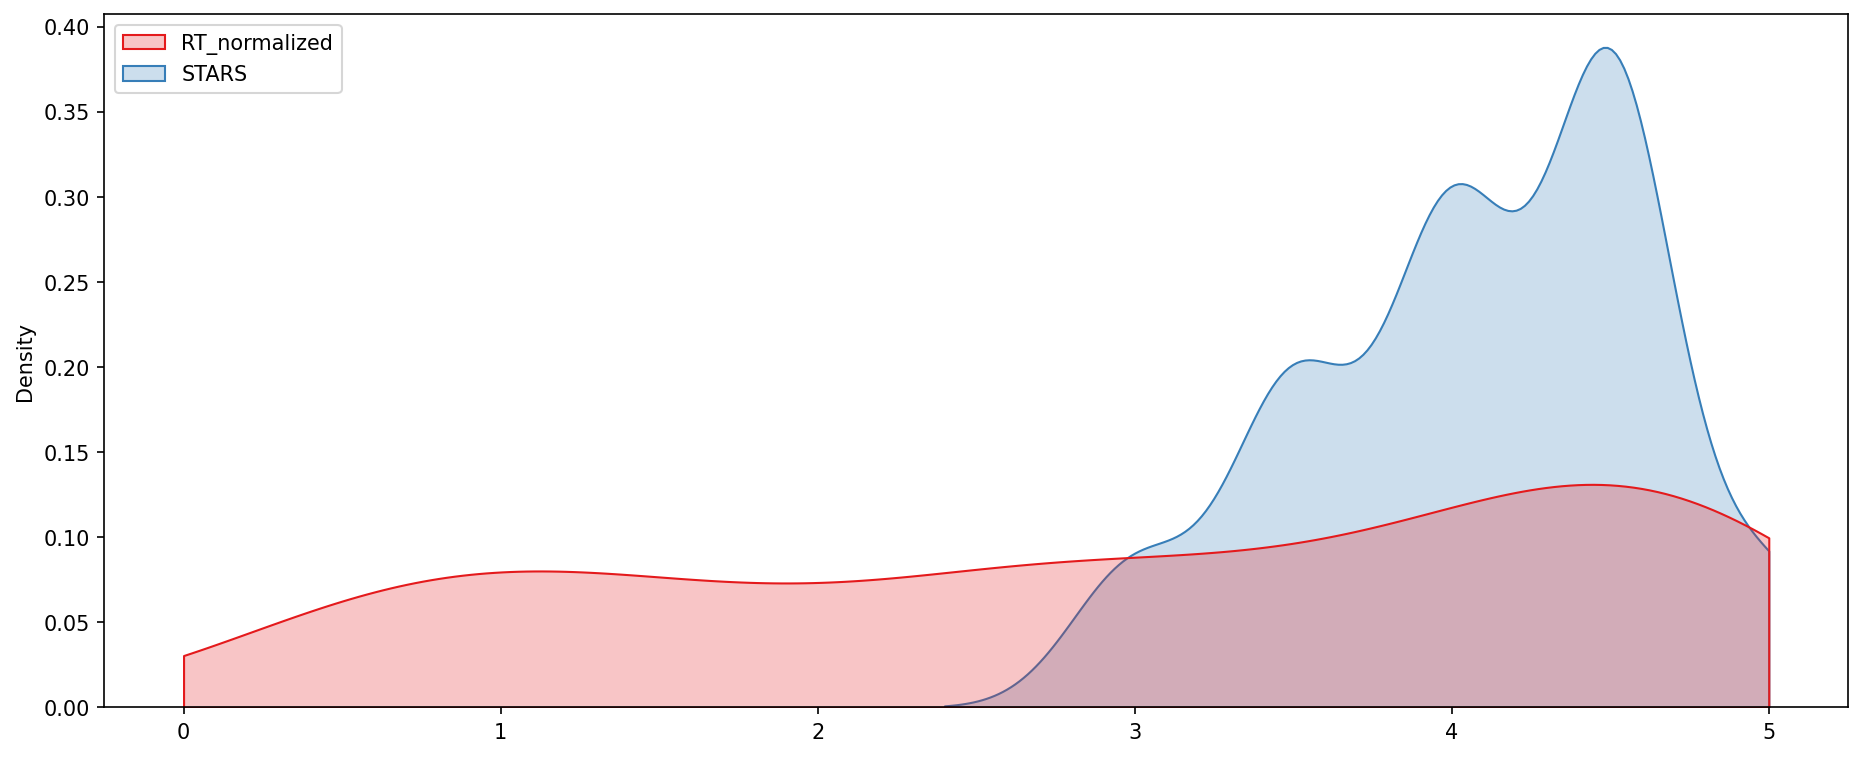

In [73]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_normalized','STARS']],clip=[0,5],fill=True, palette='Set1',ax=ax)
move_legend(ax, "upper left")

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

##### Let's show all normalized DataFrame (norm_scores)

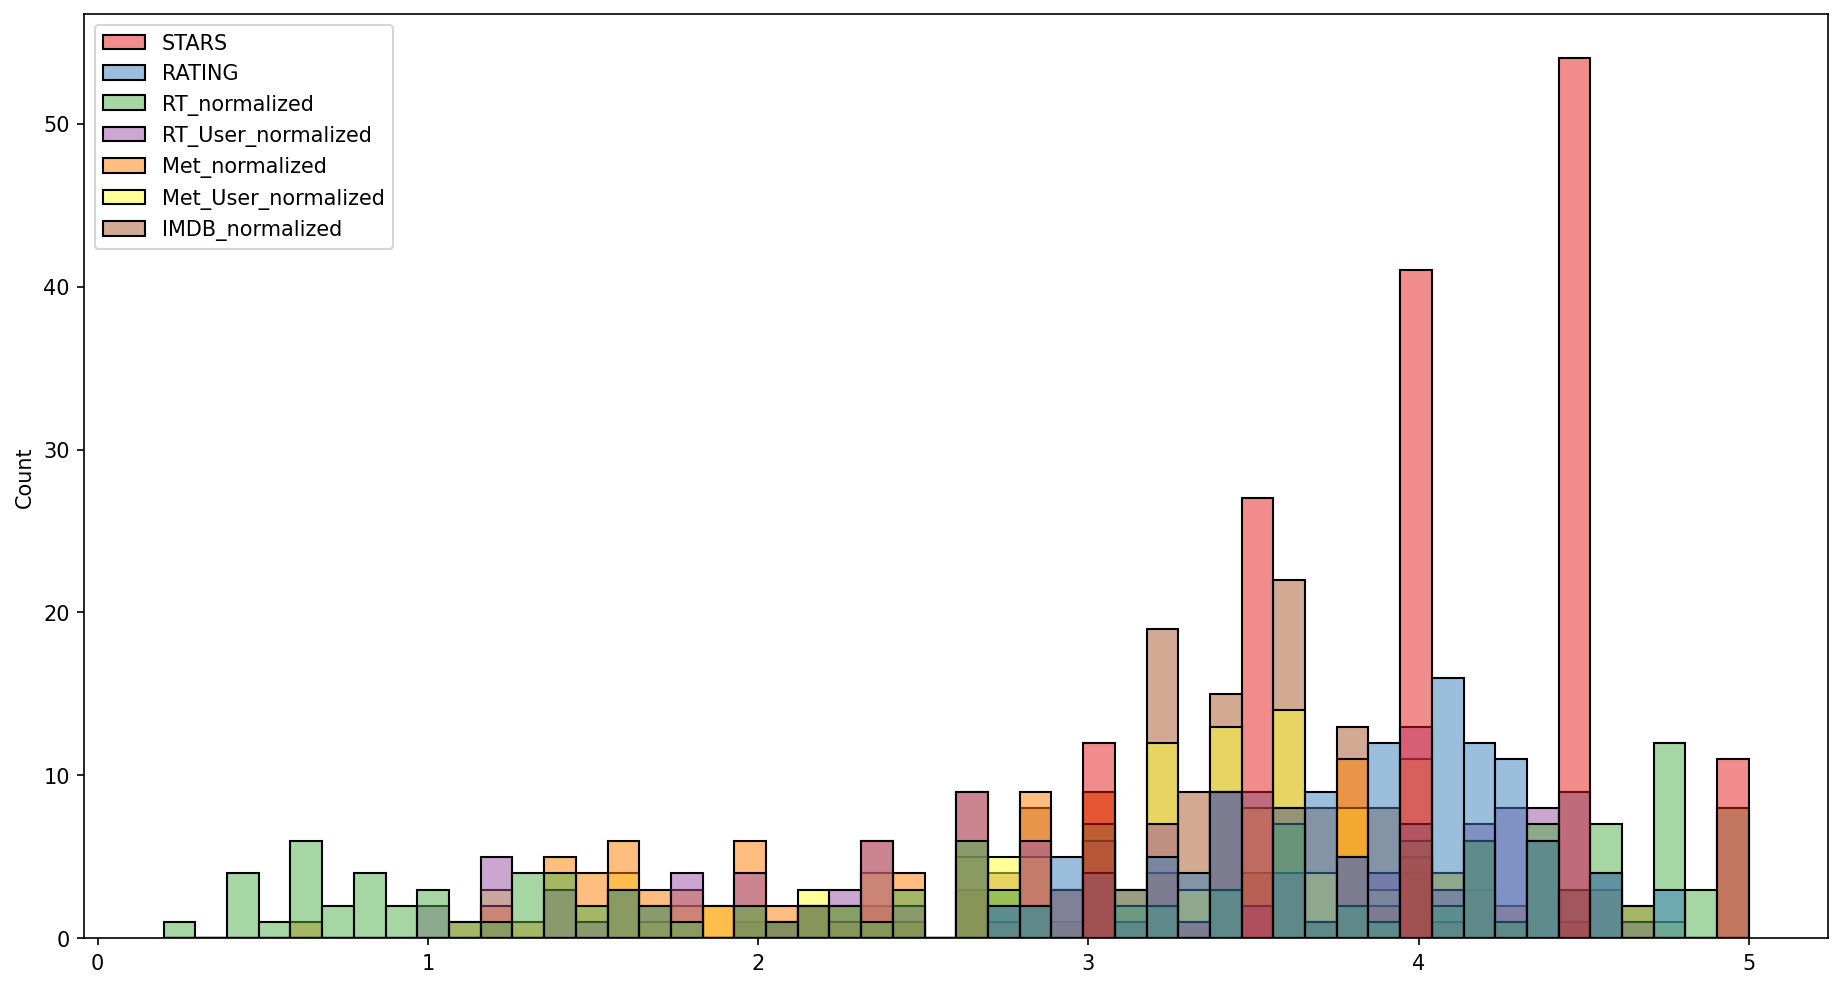

In [74]:
plt.subplots(figsize=(15,8), dpi=150)  # it works without this line, but it looks nicer with this
sns.histplot(norm_scores, bins=50, palette="Set1");


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

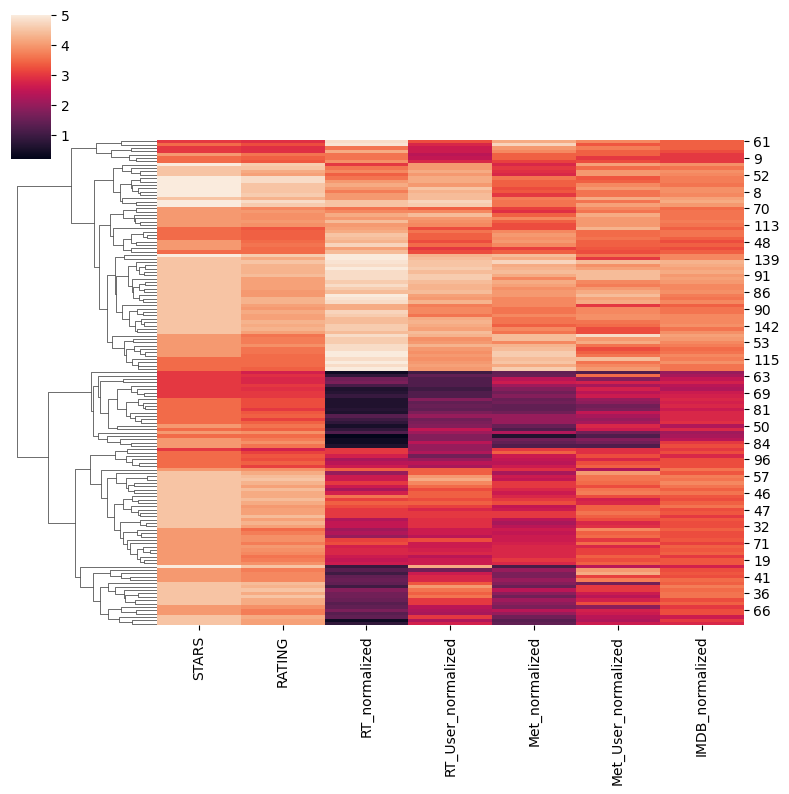

In [75]:
# we will show hierarchy for olnly rows, not for the cols

sns.clustermap(norm_scores,col_cluster=False,figsize=(8,8));

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating (see the STARS column). 

**TASK: Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

##### Let's add the "FILM" column to our norm_scores DataFrame and create a new df.

In [76]:
# We can use the "merged_sites" df and add the FILM column

norm_movies = merged_sites[["FILM", "STARS", "RATING", 
                            "RT_normalized", "RT_User_normalized",
                            "Met_normalized", "Met_User_normalized",
                           "IMDB_normalized"]]

In [77]:
# New df
norm_movies.head()

,FILM,STARS,RATING,RT_normalized,RT_User_normalized,Met_normalized,Met_User_normalized,IMDB_normalized
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


##### Top ten lowest rated movies

In [78]:
norm_movies.nsmallest(10, "RT_normalized")

,FILM,STARS,RATING,RT_normalized,RT_User_normalized,Met_normalized,Met_User_normalized,IMDB_normalized
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

##### First we need to drop FILM column, then we can visualize the rest in terms of the top ten lowest rated movies.

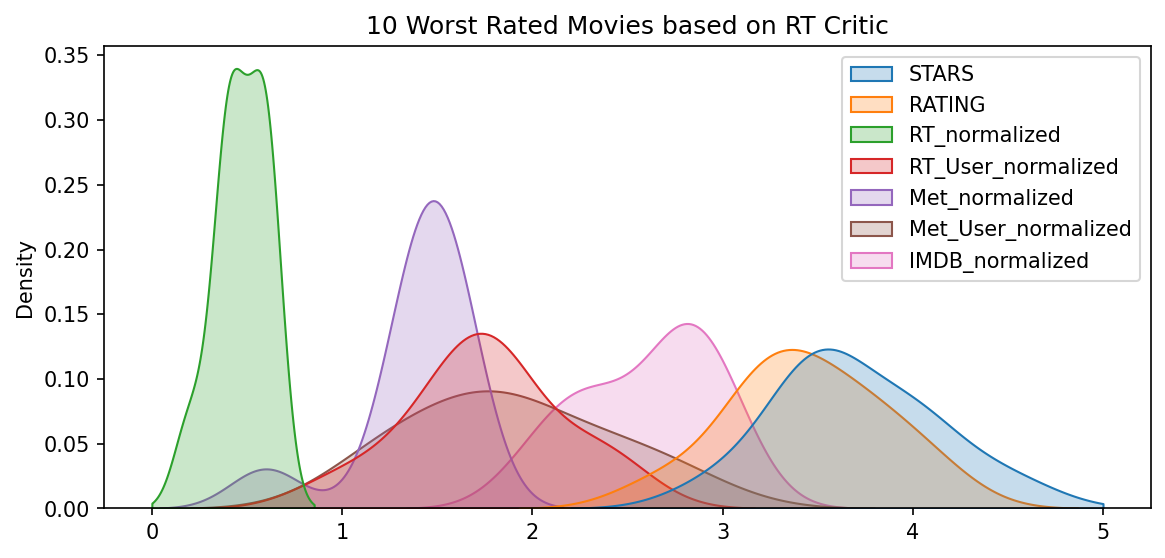

In [79]:
# In this case our data is "norm_movies.nsmallest(10, "RT_normalized").drop("FILM", axis=1)"
# Alternatively we could have assigned a variable for it, but we did not

plt.figure(figsize=(9,4), dpi=150)
sns.kdeplot(norm_movies.nsmallest(10, "RT_normalized").drop("FILM", axis=1), fill=True, clip=[0,5], palette="tab10")

# Title
plt.title("10 Worst Rated Movies based on RT Critic");

----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts:** Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!

In [80]:
# Let's find the location (row) of "Taken 3" movie

# films include Taken 3
Loc_of_Taken3 = norm_movies[norm_movies['FILM'].str.contains('Taken 3', case=False, na=False)]

Loc_of_Taken3

,FILM,STARS,RATING,RT_normalized,RT_User_normalized,Met_normalized,Met_User_normalized,IMDB_normalized
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0


In [81]:
# Use "iloc" to reach all the values (columns) in this row
norm_movies.iloc[25]

FILM                   Taken 3 (2015)
STARS                             4.5
RATING                            4.1
RT_normalized                     0.4
RT_User_normalized                2.3
Met_normalized                    1.3
Met_User_normalized               2.3
IMDB_normalized                   3.0
Name: 25, dtype: object

In [82]:
# Average of (RT_norm, RT_User_norm, Met_norm, Met_User_norm, IMDB_norm)
(0.4+2.3+1.3+2.3+3)/5

1.86

----